# Чтение

In [1]:
# функция для обработки узла в xml-дереве

def process_user(user):
    ans = []
    uid = user.get('uid')
    name = user.find('./name')
    first_name = name.get('first')
    last_name = name.get('last')
    cards = user.find('./cards')
    for card in cards:
        number = card.get('number')
        bonusprogramm = card.find('./bonusprogramm').text
        activities = card.find('./activities')
        for activity in activities:
            activity_type = activity.get('type')
            code = activity.find('./Code').text
            date = activity.find('./Date').text
            departure = activity.find('./Departure').text
            arrival = activity.find('./Arrival').text
            fare = activity.find('./Fare').text
            line = [uid, first_name, last_name, number, bonusprogramm, activity_type, code, date, departure, arrival, fare]
            ans.append(",".join(line))
    return ans

In [2]:
import xml.etree.ElementTree as ET

tree = ET.parse('/home/lev/DataScience/SpyCatch/xml/PointzAggregator-AirlinesData.xml') 

root = tree.getroot()

with open('/home/lev/DataScience/SpyCatch/xml/PointzAggregator-AirlinesData.csv', 'w') as output_file:
    output_file.write('uid,FirstName,LastName,number,bonusprogramm,activity_type,FlightNumber,DepartureDate,AirportDeparture,AirportArrival,fare\n')
    for child in root:
        user_info = process_user(child)
        for line in user_info:
            output_file.write(line)
            output_file.write('\n')

In [3]:
import pandas as pd
PointzAggregator_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/PointzAggregator-AirlinesData.csv')
PointzAggregator_df

,uid,FirstName,LastName,number,bonusprogramm,activity_type,FlightNumber,DepartureDate,AirportDeparture,AirportArrival,fare
0,613142142,IAROMIR,ZVEREV,FB 171388778,Flying Blue,Flight,KE827,2017-08-06,rea,SZX,YGRPZT
1,613142142,IAROMIR,ZVEREV,FB 171388778,Flying Blue,Flight,MU9706,2017-10-26,PEK,BSD,YSTNYV
2,103197717,VITALINA,KOROVINA,KE 696768759,Korean Air SKYPASS,Flight,DL5058,2017-09-11,CHA,ATL,YRSTKY
3,103197717,VITALINA,KOROVINA,KE 696768759,Korean Air SKYPASS,Flight,KE1,2017-04-01,rea,HNL,PRSTRU
4,103197717,VITALINA,KOROVINA,KE 696768759,Korean Air SKYPASS,Flight,DL837,2017-09-13,ATL,HNL,YGRPNG
...,...,...,...,...,...,...,...,...,...,...,...
436085,293103570,EMIL,KAZAKOV,DT 269347755,Delta SkyMiles,Flight,SU6402,2017-03-01,SVX,LED,YGRPPM
436086,293103570,EMIL,KAZAKOV,SU 856232932,Aeroflot Bonus,Flight,AR1142,2017-12-14,EZE,FCO,PRSTQA
436087,293103570,EMIL,KAZAKOV,SU 856232932,Aeroflot Bonus,Flight,AR1143,2017-09-16,FCO,EZE,YGRPFA
436088,265781820,UL'YANA,KONONOVA,DT 302785701,Delta SkyMiles,Flight,GA502,2017-05-12,CGK,PNK,YFLXAU


# Очистка

1) Избавляемся от ненужных полей:

    `activity_type` - у всех одно и то же значение
    
    `fare` - не несет полезной информации
    
    `bonusprogramm` - содержится в поле `number`
    
 2) Имена приводим к универсальному виду (н-р замена JA на IA, избавление от апострофов и тп)
 3) Избавляемся от 2018 года, тк туда попал только один день
 4) Коды аэропортов приводим к uppercase
 5) Поле `number` разбиваем отдельно на код и номер программы

In [4]:
# функция для форматирования имен
def format_name(name):
    name = name.upper()
    name = (name.replace("YA", "IA")
                .replace("YY", "YI")
                .replace("YU", "IU")
                .replace("YO", "IO")
                .replace("YA", "IA")
                .replace("OY", "OI")
                .replace("AY", "AI")
                .replace("IY", "II")
                .replace("EY", "EI")
                .replace("JA", "IA")
                .replace("JU", "IU")
                .replace("JO", "IO")
                .replace("JA", "IA")
                .replace("OJ", "OI")
                .replace("AJ", "AI")
                .replace("IJ", "II")
                .replace("EJ", "EI")
                .replace("TC", "TS")
                .replace("X", "KS")
                .replace("\'", "")
    )
    return name

In [5]:
import pandas as pd
import numpy as np

PointzAggregator_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/PointzAggregator-AirlinesData.csv')

PointzAggregator_df['Programm'] = pd.Series((np.array(PointzAggregator_df['number'].str.split().to_list()))[:,0])
PointzAggregator_df['ProgrammNumber'] = pd.Series((np.array(PointzAggregator_df['number'].str.split().to_list()))[:,1])
PointzAggregator_df.drop(['number', 'bonusprogramm', 'activity_type', 'fare'], axis=1, inplace=True)
PointzAggregator_df['AirportDeparture'] = PointzAggregator_df['AirportDeparture'].map(lambda x: x.upper())
PointzAggregator_df['AirportArrival'] = PointzAggregator_df['AirportArrival'].map(lambda x: x.upper())
PointzAggregator_df['FirstName'] = PointzAggregator_df['FirstName'].map(lambda x: format_name(x))
PointzAggregator_df['LastName'] = PointzAggregator_df['LastName'].map(lambda x: format_name(x))
PointzAggregator_df['DepartureDate'] = pd.to_datetime(PointzAggregator_df['DepartureDate'])
PointzAggregator_df = PointzAggregator_df[PointzAggregator_df['DepartureDate'].dt.year == 2017]
PointzAggregator_df.to_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv', index=False)
PointzAggregator_df

,uid,FirstName,LastName,FlightNumber,DepartureDate,AirportDeparture,AirportArrival,Programm,ProgrammNumber
0,613142142,IAROMIR,ZVEREV,KE827,2017-08-06,REA,SZX,FB,171388778
1,613142142,IAROMIR,ZVEREV,MU9706,2017-10-26,PEK,BSD,FB,171388778
2,103197717,VITALINA,KOROVINA,DL5058,2017-09-11,CHA,ATL,KE,696768759
3,103197717,VITALINA,KOROVINA,KE1,2017-04-01,REA,HNL,KE,696768759
4,103197717,VITALINA,KOROVINA,DL837,2017-09-13,ATL,HNL,KE,696768759
...,...,...,...,...,...,...,...,...,...
436085,293103570,EMIL,KAZAKOV,SU6402,2017-03-01,SVX,LED,DT,269347755
436086,293103570,EMIL,KAZAKOV,AR1142,2017-12-14,EZE,FCO,SU,856232932
436087,293103570,EMIL,KAZAKOV,AR1143,2017-09-16,FCO,EZE,SU,856232932
436088,265781820,ULIANA,KONONOVA,GA502,2017-05-12,CGK,PNK,DT,302785701


# Кластеризация

Используем DBSCAN, тк он устойчив к выбросам и способен классифицировать шумы. Подозрительных пассажиров как раз ожидаем увидеть в шумах. Для кластеризации нужно выделить манеру совершения перелетов у пользователей. В качестве первого приближения характеризовать пользователя будем через его ежемесячное число перелетов

In [7]:
import pandas as pd
import numpy as np
xml_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv', dtype = {'ProgrammNumber':int})
xml_df 

,uid,FirstName,LastName,FlightNumber,DepartureDate,AirportDeparture,AirportArrival,Programm,ProgrammNumber
0,613142142,IAROMIR,ZVEREV,KE827,2017-08-06,REA,SZX,FB,171388778
1,613142142,IAROMIR,ZVEREV,MU9706,2017-10-26,PEK,BSD,FB,171388778
2,103197717,VITALINA,KOROVINA,DL5058,2017-09-11,CHA,ATL,KE,696768759
3,103197717,VITALINA,KOROVINA,KE1,2017-04-01,REA,HNL,KE,696768759
4,103197717,VITALINA,KOROVINA,DL837,2017-09-13,ATL,HNL,KE,696768759
...,...,...,...,...,...,...,...,...,...
434917,293103570,EMIL,KAZAKOV,SU6402,2017-03-01,SVX,LED,DT,269347755
434918,293103570,EMIL,KAZAKOV,AR1142,2017-12-14,EZE,FCO,SU,856232932
434919,293103570,EMIL,KAZAKOV,AR1143,2017-09-16,FCO,EZE,SU,856232932
434920,265781820,ULIANA,KONONOVA,GA502,2017-05-12,CGK,PNK,DT,302785701


In [8]:
total_flights_per_user_df = xml_df.groupby('uid')['FlightNumber'].count()
total_flights_per_user_df = total_flights_per_user_df.reset_index(name='TotalFlights')
total_flights_per_user_df

,uid,TotalFlights
0,100056827,5
1,100068002,6
2,100096293,6
3,100145156,13
4,100157674,6
...,...,...
56936,999861164,6
56937,999891790,9
56938,999920175,12
56939,999947177,4


In [9]:
xml_df['DepartureDate'] = pd.to_datetime(xml_df['DepartureDate'])
xml_df['Month'] = xml_df['DepartureDate'].dt.month
month_flights_per_user_df = xml_df.groupby(['uid', 'Month'])['FlightNumber'].count()
month_flights_per_user_df = month_flights_per_user_df.reset_index(name='TotalFlights')
unique_uids = xml_df['uid'].unique()
unique_months = range(1, 13)
all_uids_months = pd.MultiIndex.from_product([unique_uids, unique_months], names=['uid', 'Month'])
all_uids_months = pd.DataFrame(index=all_uids_months).reset_index()
month_flights_per_user_df = pd.merge(all_uids_months, month_flights_per_user_df, on=['uid', 'Month'], how='left')
month_flights_per_user_df.fillna(0).astype(int)
month_flights_per_user_df = month_flights_per_user_df.pivot_table(values='TotalFlights', index='uid', columns='Month', fill_value=0)
xml_stat_df = pd.merge(month_flights_per_user_df, total_flights_per_user_df, on='uid', how='left')
xml_stat_df.to_csv('/home/lev/DataScience/SpyCatch/xml/xml_flight_stats.csv', index=False)
xml_stat_df

,uid,1,2,3,4,5,6,7,8,9,10,11,12,TotalFlights
0,100056827,0,1,0,0,0,0,0,1,2,0,0,1,5
1,100068002,0,0,1,0,1,0,0,1,0,2,0,1,6
2,100096293,0,0,1,0,0,0,1,0,2,1,1,0,6
3,100145156,2,1,1,0,1,2,0,2,1,1,0,2,13
4,100157674,0,0,0,0,0,1,0,1,1,0,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,999861164,0,1,1,0,0,1,0,0,0,0,1,2,6
56937,999891790,1,1,1,1,0,0,2,1,1,1,0,0,9
56938,999920175,1,0,1,1,2,1,1,3,0,1,1,0,12
56939,999947177,0,0,0,0,1,1,0,0,1,0,1,0,4


In [31]:
# Подбор оптимальных гиперпараметров для DBSCAN на основе оценки silhouette_score
# Также удерживаем число найденных кластеров и долю шумов в разумнх пределах
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features = xml_stat_df.columns[1:-1] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(xml_stat_df[features])

In [33]:
min_eps = 0.4
max_eps = 10 # final step is not included!!
step_eps = 0.1

min_n_neigh = 4
max_n_neigh = 8 # final step is not included!!
step_n_neigh = 1

n_users = len(xml_stat_df)

param_results = {}

for min_samples_ in np.arange(min_n_neigh, max_n_neigh, step_n_neigh):
    eps_vals = []
    score_vals = []
    outliers_vals = []
    ncluster_vals = []
    for eps_ in np.arange(min_eps, max_eps, step_eps):
        dbscan = DBSCAN(eps=eps_, min_samples=min_samples_) 
        clusters = dbscan.fit_predict(scaled_features)
        ncluster = len(set(clusters) - {-1})
        if ncluster == 1:
            break
        cluster_indices = np.where(clusters != -1)
        filtered_scaled_features = scaled_features[cluster_indices]
        filtered_clusters = clusters[cluster_indices]

        score = silhouette_score(
          filtered_scaled_features, 
          filtered_clusters,
          metric='euclidean'
        )
        
        outliers = np.sum(clusters == -1) / n_users
        
        eps_vals.append(eps_)
        score_vals.append(score)
        outliers_vals.append(outliers)
        ncluster_vals.append(ncluster)

        print("min_samples: ", min_samples_)
        print("eps: ", eps_)
        print("Number of clusters: ", ncluster)
        print("Silhouette Score: ", score)
        print("Outliers: ", outliers)
        print("########")
        
    param_results[min_samples_] = [eps_vals, score_vals, outliers_vals, ncluster_vals]
    

min_samples:  4
eps:  0.4
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.5
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.6
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.7
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.7999999999999999
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.8999999999999999
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  0.9999999999999999
Number of clusters:  2027
Silhouette Score:  0.999999987662065
Outliers:  0.6470381623083543
########
min_samples:  4
eps:  1.0999999999999999
Number of clusters

min_samples:  6
eps:  0.9999999999999999
Number of clusters:  1139
Silhouette Score:  0.9999999868828519
Outliers:  0.71533692769709
########
min_samples:  6
eps:  1.0999999999999999
Number of clusters:  844
Silhouette Score:  0.19444771227998908
Outliers:  0.4856254719797685
########
min_samples:  6
eps:  1.1999999999999997
Number of clusters:  82
Silhouette Score:  -0.010793141488972934
Outliers:  0.37140197748546744
########
min_samples:  6
eps:  1.2999999999999998
Number of clusters:  12
Silhouette Score:  -0.08949005797973167
Outliers:  0.33634814983930733
########
min_samples:  6
eps:  1.4
Number of clusters:  12
Silhouette Score:  -0.08949005797973167
Outliers:  0.33634814983930733
########
min_samples:  6
eps:  1.4999999999999996
Number of clusters:  12
Silhouette Score:  -0.08949005797973167
Outliers:  0.33634814983930733
########
min_samples:  6
eps:  1.5999999999999996
Number of clusters:  11
Silhouette Score:  -0.015712418818687738
Outliers:  0.2630266416114926
########
min

In [56]:
# Представление результатов (тут красота наводится)

import matplotlib.pyplot as plt
import numpy as np
my_colors = ['#ff9973', '#5efffd', '#ffd6e1', '#e898ac','#1a5e8f', '#fc723f', '#f64975']

plt.rcParams['axes.facecolor'] = '#002845'
plt.rcParams['figure.facecolor'] = '#002845'
plt.rcParams['text.color'] = '#002845'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_colors)
plt.rcParams['legend.labelcolor'] = 'white'


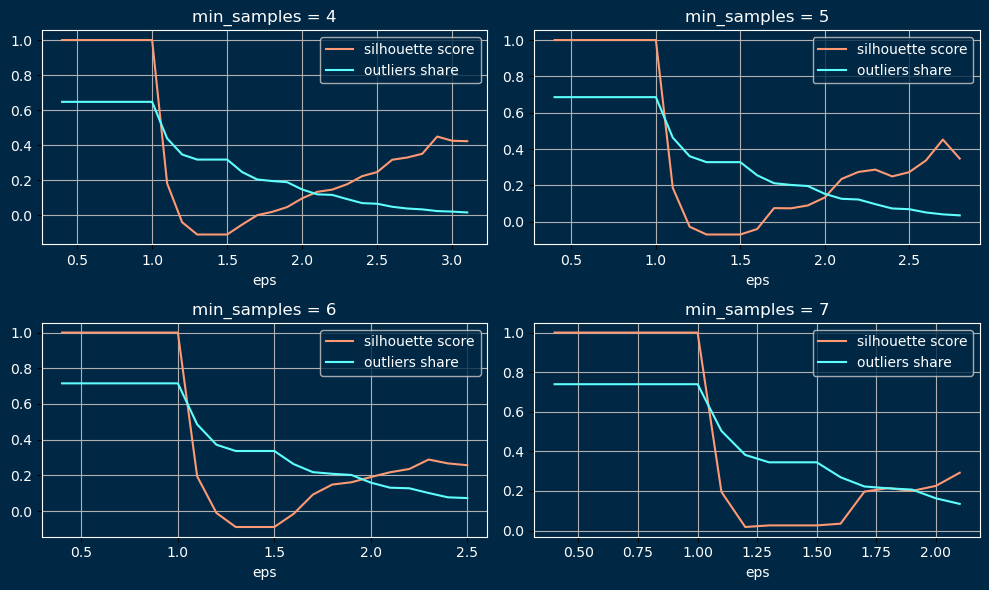

In [58]:


# Create a figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# min_samples = 4
axs[0, 0].plot(param_results[4][0], param_results[4][1], label='silhouette score')
axs[0, 0].plot(param_results[4][0], param_results[4][2], label='outliers share')
axs[0, 0].set_xlabel("eps")
axs[0, 0].set_title("min_samples = 4")
axs[0, 0].grid()
axs[0, 0].legend()

# min_samples = 5
axs[0, 1].plot(param_results[5][0], param_results[5][1], label='silhouette score')
axs[0, 1].plot(param_results[5][0], param_results[5][2], label='outliers share')
axs[0, 1].set_xlabel("eps")
axs[0, 1].set_title("min_samples = 5")
axs[0, 1].grid()
axs[0, 1].legend()

# min_samples = 6
axs[1, 0].plot(param_results[6][0], param_results[6][1], label='silhouette score')
axs[1, 0].plot(param_results[6][0], param_results[6][2], label='outliers share')
axs[1, 0].set_xlabel("eps")
axs[1, 0].set_title("min_samples = 6")
axs[1, 0].grid()
axs[1, 0].legend()

# min_samples = 7
axs[1, 1].plot(param_results[7][0], param_results[7][1], label='silhouette score')
axs[1, 1].plot(param_results[7][0], param_results[7][2], label='outliers share')
axs[1, 1].set_xlabel("eps")
axs[1, 1].set_title("min_samples = 7")
axs[1, 1].grid()
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

##  Попытка в feature engineering

Мы никак не учитывали направления перелетов при полном их подсчете, а что если человек летит из странного места в другое странное место? Нужно как-то оценить популярность выбора человека. Поступим следующим образом: для каждого аэропорта в каждом месяце рассчитаем полное число отбытий и прибытий. Если отбытий больше, то отбытия популярнее, если прибытий больше, то наоборот. Мы хотим наказать тех, кто делает непопулярный выбор отбытия и непопулярный выбор прибытия. Если человек поступает как большинство (большинство - это 50%), то ему назначается вес 1 и все хорошо, если же выбор непопулярный, то вес больше 1. Дальше веса для отбытия и прибытия перемножаются и суммируются внутри месяца. Чтобы при этом отличить тех, кто много летал по обычным маршрутам от тех, кто летал мало, но по странным, полученную сумму весов разделим на полное число перелетов пассажира за данный месяц. 

In [22]:
# Информация по числу отбытий из каждого аэропорта по месяцам

import pandas as pd
import numpy as np

xml_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv')

total_from_flights_per_airport_df = xml_df.groupby('AirportDeparture')['FlightNumber'].count()
total_from_flights_per_airport_df = total_from_flights_per_airport_df.reset_index(name='TotalDepartures')


xml_df['DepartureDate'] = pd.to_datetime(xml_df['DepartureDate'])
xml_df['Month'] = xml_df['DepartureDate'].dt.month
month_from_flights_per_airport_df = xml_df.groupby(['AirportDeparture', 'Month'])['FlightNumber'].count()
month_from_flights_per_airport_df = month_from_flights_per_airport_df.reset_index(name='TotalDepartures')
unique_airports =  np.union1d(xml_df['AirportDeparture'].unique(), xml_df['AirportArrival'].unique())
unique_months = range(1, 13)
all_froms_months = pd.MultiIndex.from_product([unique_airports, unique_months], names=['AirportDeparture', 'Month'])
all_froms_months = pd.DataFrame(index=all_froms_months).reset_index()
month_from_flights_per_airport_df = pd.merge(all_froms_months, month_from_flights_per_airport_df, on=['AirportDeparture', 'Month'], how='left')
month_from_flights_per_airport_df = month_from_flights_per_airport_df.pivot_table(values='TotalDepartures', index='AirportDeparture', columns='Month', fill_value=0, dropna=False)
month_from_flights_per_airport_df = pd.merge(month_from_flights_per_airport_df, total_from_flights_per_airport_df, on='AirportDeparture', how='outer')
month_from_flights_per_airport_df


,AirportDeparture,1,2,3,4,5,6,7,8,9,10,11,12,TotalDepartures
0,AAL,0,1,4,3,4,4,1,6,3,3,7,4,40.0
1,AAQ,372,114,49,29,17,23,11,11,12,7,8,7,660.0
2,AAT,0,1,3,3,1,5,7,4,3,5,3,3,38.0
3,ABA,390,74,33,17,7,7,5,1,2,2,2,0,540.0
4,ABE,0,0,4,1,0,5,3,9,6,7,13,12,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,ZUH,4,19,29,45,58,79,81,76,83,67,75,97,713.0
1124,ZUJ,0,0,2,2,2,3,3,3,2,2,7,11,37.0
1125,ZWE,1,4,12,8,12,14,21,17,14,8,7,8,126.0
1126,ZYI,1,0,6,8,14,10,5,9,8,11,19,11,102.0


In [23]:
# Информация по числу прибытий в каждый аэропорт по месяцам
import pandas as pd
import numpy as np

xml_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv')

total_to_flights_per_airport_df = xml_df.groupby('AirportArrival')['FlightNumber'].count()
total_to_flights_per_airport_df = total_to_flights_per_airport_df.reset_index(name='TotalArrivals')


xml_df['DepartureDate'] = pd.to_datetime(xml_df['DepartureDate'])
xml_df['Month'] = xml_df['DepartureDate'].dt.month
month_to_flights_per_airport_df = xml_df.groupby(['AirportArrival', 'Month'])['FlightNumber'].count()
month_to_flights_per_airport_df = month_to_flights_per_airport_df.reset_index(name='TotalArrivals')
unique_airports =  np.union1d(xml_df['AirportDeparture'].unique(), xml_df['AirportArrival'].unique())
unique_months = range(1, 13)
all_tos_months = pd.MultiIndex.from_product([unique_airports, unique_months], names=['AirportArrival', 'Month'])
all_tos_months = pd.DataFrame(index=all_tos_months).reset_index()
month_to_flights_per_airport_df = pd.merge(all_tos_months, month_to_flights_per_airport_df, on=['AirportArrival', 'Month'], how='left')
month_to_flights_per_airport_df = month_to_flights_per_airport_df.pivot_table(values='TotalArrivals', index='AirportArrival', columns='Month', fill_value=0, dropna=False)
month_to_flights_per_airport_df = pd.merge(month_to_flights_per_airport_df, total_to_flights_per_airport_df, on='AirportArrival', how='left')
month_to_flights_per_airport_df


,AirportArrival,1,2,3,4,5,6,7,8,9,10,11,12,TotalArrivals
0,AAL,0,0,5,3,4,6,3,5,2,1,5,4,38.0
1,AAQ,46,49,36,27,17,16,10,5,11,5,8,7,237.0
2,AAT,2,2,3,2,3,5,6,4,4,7,2,3,43.0
3,ABA,18,14,14,4,6,5,6,3,4,0,0,5,79.0
4,ABE,0,1,3,1,3,4,5,10,11,9,11,12,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,ZUH,7,14,43,54,61,82,80,82,79,71,70,101,744.0
1124,ZUJ,0,2,1,0,2,5,7,7,6,6,5,7,48.0
1125,ZWE,3,7,11,19,14,11,17,14,19,9,9,13,146.0
1126,ZYI,0,0,9,10,9,7,7,12,8,13,8,9,92.0


In [24]:
import pandas as pd
import numpy as np

user_flight_stats_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_flight_stats.csv')
user_flight_stats_df

,uid,1,2,3,4,5,6,7,8,9,10,11,12,TotalFlights
0,100056827,0,1,0,0,0,0,0,1,2,0,0,1,5
1,100068002,0,0,1,0,1,0,0,1,0,2,0,1,6
2,100096293,0,0,1,0,0,0,1,0,2,1,1,0,6
3,100145156,2,1,1,0,1,2,0,2,1,1,0,2,13
4,100157674,0,0,0,0,0,1,0,1,1,0,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,999861164,0,1,1,0,0,1,0,0,0,0,1,2,6
56937,999891790,1,1,1,1,0,0,2,1,1,1,0,0,9
56938,999920175,1,0,1,1,2,1,1,3,0,1,1,0,12
56939,999947177,0,0,0,0,1,1,0,0,1,0,1,0,4


In [25]:
# функции для расчета веса перелета

def weight_function(x):
    if x > 0.5:
        return 1
    else:
        return 0.25 / x**2
    
def compute_departure_weight(Airport, month):
    TotalDeparture = month_from_flights_per_airport_df[month_from_flights_per_airport_df['AirportDeparture'] == Airport][month].sum()
    TotalArrival = month_to_flights_per_airport_df[month_to_flights_per_airport_df['AirportArrival'] == Airport][month].sum()
    return weight_function(TotalDeparture / (TotalDeparture + TotalArrival))

def compute_arrival_weight(Airport, month):
    TotalDeparture = month_from_flights_per_airport_df[month_from_flights_per_airport_df['AirportDeparture'] == Airport][month].sum()
    TotalArrival = month_to_flights_per_airport_df[month_to_flights_per_airport_df['AirportArrival'] == Airport][month].sum()
    return weight_function(TotalArrival / (TotalDeparture + TotalArrival))

def compute_weight(AirportDeparture, AirportArrival, month):
    return compute_departure_weight(AirportDeparture, month) * compute_arrival_weight(AirportArrival, month)



In [26]:
import pandas as pd
import numpy as np

xml_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_cleared.csv')
xml_df['DepartureDate'] = pd.to_datetime(xml_df['DepartureDate'])
xml_df['Month'] = xml_df['DepartureDate'].dt.month
xml_df

,uid,FirstName,LastName,FlightNumber,DepartureDate,AirportDeparture,AirportArrival,Programm,ProgrammNumber,Month
0,613142142,IAROMIR,ZVEREV,KE827,2017-08-06,REA,SZX,FB,171388778,8
1,613142142,IAROMIR,ZVEREV,MU9706,2017-10-26,PEK,BSD,FB,171388778,10
2,103197717,VITALINA,KOROVINA,DL5058,2017-09-11,CHA,ATL,KE,696768759,9
3,103197717,VITALINA,KOROVINA,KE1,2017-04-01,REA,HNL,KE,696768759,4
4,103197717,VITALINA,KOROVINA,DL837,2017-09-13,ATL,HNL,KE,696768759,9
...,...,...,...,...,...,...,...,...,...,...
434917,293103570,EMIL,KAZAKOV,SU6402,2017-03-01,SVX,LED,DT,269347755,3
434918,293103570,EMIL,KAZAKOV,AR1142,2017-12-14,EZE,FCO,SU,856232932,12
434919,293103570,EMIL,KAZAKOV,AR1143,2017-09-16,FCO,EZE,SU,856232932,9
434920,265781820,ULIANA,KONONOVA,GA502,2017-05-12,CGK,PNK,DT,302785701,5


In [30]:
# создаем новый датасет с перевзвешенными полетами за месяц

unique_uids = xml_df['uid'].unique()
with open('/home/lev/DataScience/SpyCatch/xml/xml_weight_flight_stats.csv', 'w') as output_file:
    output_file.write('uid,1,2,3,4,5,6,7,8,9,10,11,12\n')
    for uid in unique_uids:
        month_stat =  [0 for _ in range(13)]
        for index, row in xml_df[xml_df['uid'] == uid].iterrows():
            month = row['Month']
            AirportDeparture = row['AirportDeparture']
            AirportArrival = row['AirportArrival']
            month_stat[month] += compute_weight(AirportDeparture, AirportArrival, month)
        output_file.write(str(uid))
        for i in range(1, 13):
            total = user_flight_stats_df[user_flight_stats_df['uid'] == uid][str(i)].sum()
            if total == 0:
                output_file.write(',' + str(0))
            else:  
                output_file.write(',' + str(month_stat[i] / total))
        output_file.write('\n')

In [1]:
import pandas as pd
import numpy as np

xml_weight_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_weight_flight_stats.csv')
xml_weight_df

,uid,1,2,3,4,5,6,7,8,9,10,11,12
0,613142142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,103197717,0.000000,1.253437,0.000000,1.053324,0.000000,0.000000,0.000000,0.000000,1.022350,0.000000,0.000000,0.000000
2,138879468,0.000000,1.375795,1.112950,0.000000,1.216787,1.000000,1.070289,1.025075,1.391344,1.000000,1.076484,1.210000
3,197093494,0.000000,0.000000,0.000000,0.000000,1.384083,0.000000,0.000000,0.000000,1.092821,0.000000,0.000000,0.000000
4,513348472,0.000000,1.151313,1.022986,1.035751,0.000000,1.277360,1.201698,0.000000,0.000000,0.000000,1.068163,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,377652963,0.000000,0.000000,1.296701,0.000000,0.000000,1.310004,1.367710,0.000000,0.000000,1.061406,1.336914,0.000000
56937,316245744,1.472259,0.000000,1.062523,0.000000,1.179967,0.000000,1.242677,1.085069,0.000000,1.163047,0.000000,1.021331
56938,280456697,1.000000,1.126718,1.148351,1.000000,0.000000,1.258013,1.078267,1.075257,1.000000,1.323638,0.000000,1.138845
56939,293103570,0.000000,1.236697,1.229474,0.000000,1.000000,1.330150,0.000000,0.000000,1.109357,0.000000,1.112757,1.325960


In [4]:
# Подбор оптимальных гиперпараметров для DBSCAN на основе оценки silhouette_score
# Также удерживаем число найденных кластеров и долю шумов в разумнх пределах
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features = xml_weight_df.columns[1:] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(xml_weight_df[features])

In [5]:
min_eps = 0.4
max_eps = 3.6 # final step is not included!!
step_eps = 0.1

min_n_neigh = 4
max_n_neigh = 5 # final step is not included!!
step_n_neigh = 1

n_users = len(xml_weight_df)

param_results = {}

for min_samples_ in np.arange(min_n_neigh, max_n_neigh, step_n_neigh):
    eps_vals = []
    score_vals = []
    outliers_vals = []
    ncluster_vals = []
    for eps_ in np.arange(min_eps, max_eps, step_eps):
        dbscan = DBSCAN(eps=eps_, min_samples=min_samples_) 
        clusters = dbscan.fit_predict(scaled_features)
        ncluster = len(set(clusters) - {-1})
        if ncluster == 1:
            break
        cluster_indices = np.where(clusters != -1)
        filtered_scaled_features = scaled_features[cluster_indices]
        filtered_clusters = clusters[cluster_indices]

        score = silhouette_score(
          filtered_scaled_features, 
          filtered_clusters,
          metric='euclidean'
        )
        
        outliers = np.sum(clusters == -1) / n_users
        
        eps_vals.append(eps_)
        score_vals.append(score)
        outliers_vals.append(outliers)
        ncluster_vals.append(ncluster)

        print("min_samples: ", min_samples_)
        print("eps: ", eps_)
        print("Number of clusters: ", ncluster)
        print("Silhouette Score: ", score)
        print("Outliers: ", outliers)
        print("########")
        
    param_results[min_samples_] = [eps_vals, score_vals, outliers_vals, ncluster_vals]


min_samples:  4
eps:  0.4
Number of clusters:  1535
Silhouette Score:  0.7023532786228504
Outliers:  0.4447234857132822
########
min_samples:  4
eps:  0.5
Number of clusters:  1879
Silhouette Score:  0.6748293699050927
Outliers:  0.3145009746931034
########
min_samples:  4
eps:  0.6
Number of clusters:  1986
Silhouette Score:  0.6519533369813599
Outliers:  0.22837674083700674
########
min_samples:  4
eps:  0.7
Number of clusters:  2016
Silhouette Score:  0.6311422073698167
Outliers:  0.17137036581724943
########
min_samples:  4
eps:  0.7999999999999999
Number of clusters:  2035
Silhouette Score:  0.6144474342612388
Outliers:  0.13601798352680844
########
min_samples:  4
eps:  0.8999999999999999
Number of clusters:  2038
Silhouette Score:  0.6009821710510201
Outliers:  0.11053546653553678
########
min_samples:  4
eps:  0.9999999999999999
Number of clusters:  2042
Silhouette Score:  0.5906866959567637
Outliers:  0.09325442124304104
########
min_samples:  4
eps:  1.0999999999999999
Number

In [7]:
# Представление результатов (тут красота наводится)

import matplotlib.pyplot as plt
import numpy as np
my_colors = ['#ff9973', '#5efffd', '#ffd6e1', '#e898ac','#1a5e8f', '#fc723f', '#f64975']

plt.rcParams['axes.facecolor'] = '#002845'
plt.rcParams['figure.facecolor'] = '#002845'
plt.rcParams['text.color'] = '#002845'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_colors)
plt.rcParams['legend.labelcolor'] = 'white'


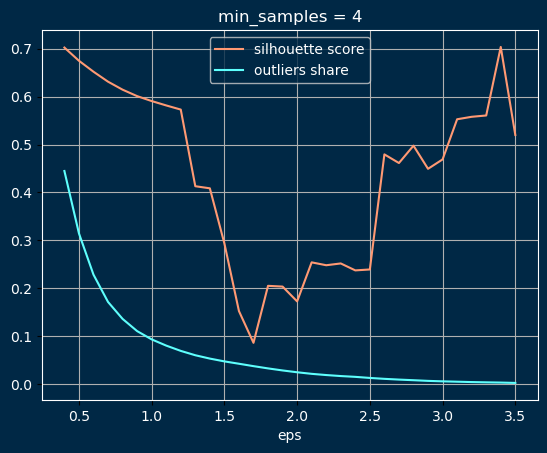

In [17]:
# min_samples = 4
plt.plot(param_results[4][0], param_results[4][1], label='silhouette score')
plt.plot(param_results[4][0], param_results[4][2], label='outliers share')


plt.title("min_samples = 4")
plt.xlabel("eps")
plt.grid()
plt.legend()
plt.show()

# LOF


In [21]:
import pandas as pd
import numpy as np

xml_stats_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_flight_stats.csv')
xml_stats_df

,uid,1,2,3,4,5,6,7,8,9,10,11,12,TotalFlights
0,100056827,0,1,0,0,0,0,0,1,2,0,0,1,5
1,100068002,0,0,1,0,1,0,0,1,0,2,0,1,6
2,100096293,0,0,1,0,0,0,1,0,2,1,1,0,6
3,100145156,2,1,1,0,1,2,0,2,1,1,0,2,13
4,100157674,0,0,0,0,0,1,0,1,1,0,3,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,999861164,0,1,1,0,0,1,0,0,0,0,1,2,6
56937,999891790,1,1,1,1,0,0,2,1,1,1,0,0,9
56938,999920175,1,0,1,1,2,1,1,3,0,1,1,0,12
56939,999947177,0,0,0,0,1,1,0,0,1,0,1,0,4


In [23]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

features = xml_stats_df.columns[1:-1] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(xml_stats_df[features])

clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(scaled_features)

In [24]:
# доля шпионов
len(np.where(y_pred == -1)[0]) / len(xml_stats_df)

0.051281150664723135

In [25]:
import pandas as pd
import numpy as np

xml_weight_df = pd.read_csv('/home/lev/DataScience/SpyCatch/xml/xml_weight_flight_stats.csv')
xml_weight_df

,uid,1,2,3,4,5,6,7,8,9,10,11,12
0,613142142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
1,103197717,0.000000,1.253437,0.000000,1.053324,0.000000,0.000000,0.000000,0.000000,1.022350,0.000000,0.000000,0.000000
2,138879468,0.000000,1.375795,1.112950,0.000000,1.216787,1.000000,1.070289,1.025075,1.391344,1.000000,1.076484,1.210000
3,197093494,0.000000,0.000000,0.000000,0.000000,1.384083,0.000000,0.000000,0.000000,1.092821,0.000000,0.000000,0.000000
4,513348472,0.000000,1.151313,1.022986,1.035751,0.000000,1.277360,1.201698,0.000000,0.000000,0.000000,1.068163,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,377652963,0.000000,0.000000,1.296701,0.000000,0.000000,1.310004,1.367710,0.000000,0.000000,1.061406,1.336914,0.000000
56937,316245744,1.472259,0.000000,1.062523,0.000000,1.179967,0.000000,1.242677,1.085069,0.000000,1.163047,0.000000,1.021331
56938,280456697,1.000000,1.126718,1.148351,1.000000,0.000000,1.258013,1.078267,1.075257,1.000000,1.323638,0.000000,1.138845
56939,293103570,0.000000,1.236697,1.229474,0.000000,1.000000,1.330150,0.000000,0.000000,1.109357,0.000000,1.112757,1.325960


In [26]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

features = xml_weight_df.columns[1:-1] 

scaler = StandardScaler()
scaled_features = scaler.fit_transform(xml_weight_df[features])

clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(scaled_features)

In [27]:
# доля шпионов
len(np.where(y_pred == -1)[0]) / len(xml_weight_df)

0.15995504118297887